<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_Multilayer_perceptron_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

# import dataset


In [357]:
cred_data1=pd.read_csv("/content/drive/MyDrive/credit_card_fraud.csv")
cred_data1.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [358]:
cred_data1.isnull().sum()

Transaction Date and Time                     0
Transaction Amount                            0
Cardholder Name                               0
Card Number (Hashed or Encrypted)             0
Merchant Name                                 0
Merchant Category Code (MCC)                  0
Transaction Location (City or ZIP Code)       0
Transaction Currency                          0
Card Type                                     0
Card Expiration Date                          0
CVV Code (Hashed or Encrypted)                0
Transaction Response Code                     0
Transaction ID                                0
Fraud Flag or Label                           0
Previous Transactions                         0
Transaction Source                            0
IP Address                                    0
Device Information                            0
User Account Information                   4010
Transaction Notes                             0
dtype: int64

In [359]:
cred_data1['User Account Information'].fillna('unknown', inplace=True)
cred_data1.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
User Account Information                   0
Transaction Notes                          0
dtype: int64

In [360]:
#take only certain samples
df=cred_data1.sample(250)
df

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
6341,2021-07-21 01:26:24,3411.58,Zara Hora,2951b5d36d4fdecf193ad7ed8e01dab48ef21026a97301...,"Sarraf, Dewan and Balay",9237,Nadiad,USD,Visa,06/33,af5422f824076084bed9b8a09086ac59f0ed8c74eea7b1...,12,1f2d36f4-c13e-4a69-a2f5-fb32649ed7b3,1,1,In-Person,161.61.80.182,Mobile,unknown,Minima quis iure repudiandae nulla expedita ne...
943,2020-11-01 17:35:40,2034.09,Vidur Bava,41382e8f01aa089ba4cedadcf3fe12ff23d3f9e2fc5daa...,Bhattacharyya Inc,4883,Rajkot,INR,MasterCard,12/26,bda584056eb9957d6c681e00079eff36fec289e2a0432a...,0,4d0a8ea3-a205-4807-907f-043d71eea077,0,None,In-Person,155.185.17.87,Mobile,unknown,Quas ipsum quasi earum harum. Iusto explicabo ...
7279,2021-09-24 05:45:21,2564.83,Aniruddh Bal,9ac83c725c30f69aaab233354ab9bda24368d883c9c420...,Warrior-Bhasin,9042,Pune,INR,MasterCard,10/27,7045d16ae7f043ec25774a0a85d6f479e5bb019e9c5a15...,5,f3c5a321-a0de-4377-92a7-40b2df4b6bb4,1,None,Online,185.103.138.202,Desktop,rameva,Quam magni occaecati aliquid quisquam quidem. ...
5013,2023-09-23 19:11:35,318.34,Aaryahi Wali,34f8df937bb952382792c6fa904ac982bff322a40cbfd6...,Goel-Rege,9568,Sirsa,EUR,American Express,06/29,00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec...,0,aa1ce20a-36ae-466b-b5a3-03054b3854c1,0,1,In-Person,216.234.233.23,Desktop,uvarma,Consectetur placeat placeat quaerat tempora de...
7965,2022-01-26 05:14:51,3106.06,Dishani Dugar,951e625aa43e933d31891d896a4aef387beea4237dec64...,Chacko Group,6517,Mango,EUR,Visa,01/25,396f804443825586c1283a27fdcadf74abb82008bcd9b2...,0,918fc58c-3dda-4bf3-b33a-c3b0628e0705,0,2,In-Person,181.179.148.13,Desktop,buchhrishita,Deserunt itaque molestiae vero quia corrupti s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2023-08-28 16:59:19,933.37,Tejas Ganesan,75cc5c8f15fff4d7b95b827ddc0677a1463ed716a16345...,"Sathe, Rana and Banerjee",1757,Ranchi,INR,MasterCard,09/31,c2a181d8178a9f753b013fc4bb892ceeb5dc5bcb763352...,12,521d900d-8ca5-4ee7-a8e7-39b6941e244b,0,None,In-Person,75.145.109.168,Tablet,pshenoy,Molestiae quidem deserunt quae cupiditate in t...
5149,2022-11-07 03:20:23,3297.68,Jayesh Saha,969abcc06fb96881240f084278bcca512ea0a8e313f783...,Joshi Inc,5483,Ujjain,EUR,Visa,08/33,290a0b92873bdf4e47986dc5208037bad7527653bff700...,0,24784f89-a121-4cf8-87ee-1a5f8e8debb0,1,2,In-Person,203.62.223.153,Tablet,unknown,Nemo voluptatum temporibus et soluta culpa dol...
5225,2022-05-08 12:55:16,2892.29,Anika Bose,b6a7c1344b9dcee10f70d061cde6797e86d34dce0d9b08...,Saha PLC,7101,Bangalore,INR,Visa,10/31,162753c27c8b32975a0edf5e89ab4ed8e2f06f02a182e0...,0,6bd6225d-f3c6-4c66-815b-6f754267dac0,1,1,Online,217.200.164.25,Tablet,uthkarsh92,Accusamus molestias minus suscipit enim iste l...
4649,2023-04-13 02:51:03,970.86,Ishita Sharma,480817413b9a1218f033b8ad8d79132ff3591500f53b88...,De Group,4631,Tezpur,USD,Visa,06/26,303c8bd55875dda240897db158acf70afe4226f300757f...,12,ca8b5f42-efc6-4b75-bca9-f0026c7d2e15,1,1,In-Person,16.62.26.235,Tablet,unknown,Repellendus corrupti beatae cumque. At ex et v...


In [361]:
#shape of the dataset
df.shape

(250, 20)

In [362]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 6341 to 7038
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                250 non-null    object 
 1   Transaction Amount                       250 non-null    float64
 2   Cardholder Name                          250 non-null    object 
 3   Card Number (Hashed or Encrypted)        250 non-null    object 
 4   Merchant Name                            250 non-null    object 
 5   Merchant Category Code (MCC)             250 non-null    int64  
 6   Transaction Location (City or ZIP Code)  250 non-null    object 
 7   Transaction Currency                     250 non-null    object 
 8   Card Type                                250 non-null    object 
 9   Card Expiration Date                     250 non-null    object 
 10  CVV Code (Hashed or Encrypted)           250 n

In [363]:
df.describe()

,Transaction Amount,Merchant Category Code (MCC),Transaction Response Code,Fraud Flag or Label
count,250.000000,250.000000,250.000000,250.000000
mean,2485.671920,5592.924000,5.528000,0.496000
std,1392.828122,2578.092628,4.939109,0.500987
min,58.620000,1047.000000,0.000000,0.000000
25%,1256.670000,3300.250000,0.000000,0.000000
50%,2541.200000,5509.500000,5.000000,0.000000
75%,3626.875000,7749.250000,12.000000,1.000000
max,4984.840000,9984.000000,12.000000,1.000000


In [364]:
#checking if there exist any null values
df.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
User Account Information                   0
Transaction Notes                          0
dtype: int64

In [365]:
df.fillna(0)

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
6341,2021-07-21 01:26:24,3411.58,Zara Hora,2951b5d36d4fdecf193ad7ed8e01dab48ef21026a97301...,"Sarraf, Dewan and Balay",9237,Nadiad,USD,Visa,06/33,af5422f824076084bed9b8a09086ac59f0ed8c74eea7b1...,12,1f2d36f4-c13e-4a69-a2f5-fb32649ed7b3,1,1,In-Person,161.61.80.182,Mobile,unknown,Minima quis iure repudiandae nulla expedita ne...
943,2020-11-01 17:35:40,2034.09,Vidur Bava,41382e8f01aa089ba4cedadcf3fe12ff23d3f9e2fc5daa...,Bhattacharyya Inc,4883,Rajkot,INR,MasterCard,12/26,bda584056eb9957d6c681e00079eff36fec289e2a0432a...,0,4d0a8ea3-a205-4807-907f-043d71eea077,0,None,In-Person,155.185.17.87,Mobile,unknown,Quas ipsum quasi earum harum. Iusto explicabo ...
7279,2021-09-24 05:45:21,2564.83,Aniruddh Bal,9ac83c725c30f69aaab233354ab9bda24368d883c9c420...,Warrior-Bhasin,9042,Pune,INR,MasterCard,10/27,7045d16ae7f043ec25774a0a85d6f479e5bb019e9c5a15...,5,f3c5a321-a0de-4377-92a7-40b2df4b6bb4,1,None,Online,185.103.138.202,Desktop,rameva,Quam magni occaecati aliquid quisquam quidem. ...
5013,2023-09-23 19:11:35,318.34,Aaryahi Wali,34f8df937bb952382792c6fa904ac982bff322a40cbfd6...,Goel-Rege,9568,Sirsa,EUR,American Express,06/29,00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec...,0,aa1ce20a-36ae-466b-b5a3-03054b3854c1,0,1,In-Person,216.234.233.23,Desktop,uvarma,Consectetur placeat placeat quaerat tempora de...
7965,2022-01-26 05:14:51,3106.06,Dishani Dugar,951e625aa43e933d31891d896a4aef387beea4237dec64...,Chacko Group,6517,Mango,EUR,Visa,01/25,396f804443825586c1283a27fdcadf74abb82008bcd9b2...,0,918fc58c-3dda-4bf3-b33a-c3b0628e0705,0,2,In-Person,181.179.148.13,Desktop,buchhrishita,Deserunt itaque molestiae vero quia corrupti s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2023-08-28 16:59:19,933.37,Tejas Ganesan,75cc5c8f15fff4d7b95b827ddc0677a1463ed716a16345...,"Sathe, Rana and Banerjee",1757,Ranchi,INR,MasterCard,09/31,c2a181d8178a9f753b013fc4bb892ceeb5dc5bcb763352...,12,521d900d-8ca5-4ee7-a8e7-39b6941e244b,0,None,In-Person,75.145.109.168,Tablet,pshenoy,Molestiae quidem deserunt quae cupiditate in t...
5149,2022-11-07 03:20:23,3297.68,Jayesh Saha,969abcc06fb96881240f084278bcca512ea0a8e313f783...,Joshi Inc,5483,Ujjain,EUR,Visa,08/33,290a0b92873bdf4e47986dc5208037bad7527653bff700...,0,24784f89-a121-4cf8-87ee-1a5f8e8debb0,1,2,In-Person,203.62.223.153,Tablet,unknown,Nemo voluptatum temporibus et soluta culpa dol...
5225,2022-05-08 12:55:16,2892.29,Anika Bose,b6a7c1344b9dcee10f70d061cde6797e86d34dce0d9b08...,Saha PLC,7101,Bangalore,INR,Visa,10/31,162753c27c8b32975a0edf5e89ab4ed8e2f06f02a182e0...,0,6bd6225d-f3c6-4c66-815b-6f754267dac0,1,1,Online,217.200.164.25,Tablet,uthkarsh92,Accusamus molestias minus suscipit enim iste l...
4649,2023-04-13 02:51:03,970.86,Ishita Sharma,480817413b9a1218f033b8ad8d79132ff3591500f53b88...,De Group,4631,Tezpur,USD,Visa,06/26,303c8bd55875dda240897db158acf70afe4226f300757f...,12,ca8b5f42-efc6-4b75-bca9-f0026c7d2e15,1,1,In-Person,16.62.26.235,Tablet,unknown,Repellendus corrupti beatae cumque. At ex et v...


In [366]:
df.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
User Account Information                   0
Transaction Notes                          0
dtype: int64

In [367]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [368]:
df['Fraud Flag or Label'].unique()

array([1, 0])

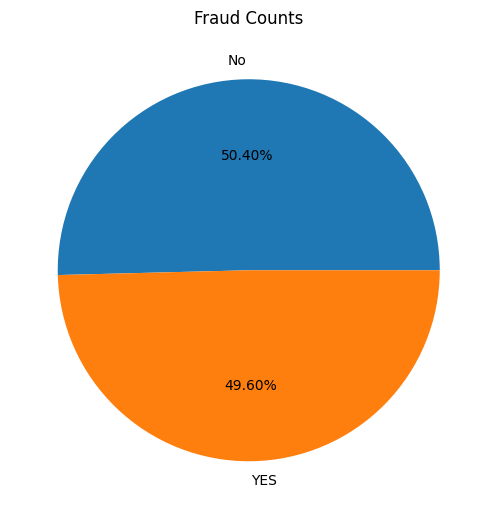

In [369]:
fraud = df["Fraud Flag or Label"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "YES"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [370]:
from sklearn.utils import resample
cls_0 = df[df["Fraud Flag or Label"]==0]
cls_1 = df[df["Fraud Flag or Label"]==1]
#Balancing data
cls_0 = resample(cls_0, replace=False, n_samples=len(cls_1))
down_samples = pd.concat([cls_1, cls_0], axis=0)

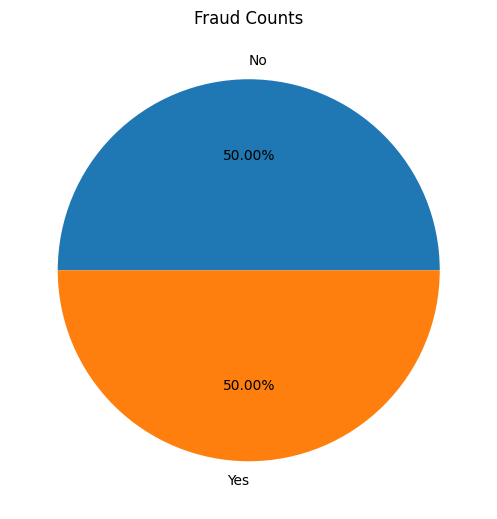

In [371]:
fraud = down_samples["Fraud Flag or Label"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "Yes"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [372]:
X=df.drop(columns=['Fraud Flag or Label'])
Y = df["Fraud Flag or Label"]

In [373]:
#X = df.drop(columns=["is_fraud"], inplace = False)
#Y = df["is_fraud"]

In [374]:
X.shape

(250, 19)

In [375]:
Y.shape

(250,)

In [376]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [377]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (200, 19) (200,)
Test set: (50, 19) (50,)


In [378]:
#implementation of multilayer perceptron
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [379]:
#with 128 input nodes
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [380]:
#with 64 input nodes
model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

In [381]:
#Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [382]:
#for 128 input nodes with adam
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 1s 22ms/step - loss: 0.7113 - accuracy: 0.5200 - val_loss: 0.7272 - val_accuracy: 0.4800
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6593 - accuracy: 0.6300 - val_loss: 0.7208 - val_accuracy: 0.4400
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6300 - accuracy: 0.7100 - val_loss: 0.7197 - val_accuracy: 0.4600
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6072 - accuracy: 0.7500 - val_loss: 0.7435 - val_accuracy: 0.4000
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5857 - accuracy: 0.7450 - val_loss: 0.7432 - val_accuracy: 0.4200
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5669 - accuracy: 0.7950 - val_loss: 0.7572 - val_accuracy: 0.4600
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7750 - val_loss: 0.7772 - val_accuracy: 0.4600
Epoch 8/50
7/7 [=================

In [383]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy1)
print('Model accuracy(64 nodes): ', accuracy2)

2/2 [==============================] - 0s 5ms/step - loss: 1.6370 - accuracy: 0.4800
Model accuracy(128 nodes):  0.47999998927116394
Model accuracy(64 nodes):  0.6200000047683716


In [384]:
pred1 = model.predict(X_test)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred1)
pred2 = model1.predict(X_test)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred2)

2/2 [==============================] - 0s 3ms/step


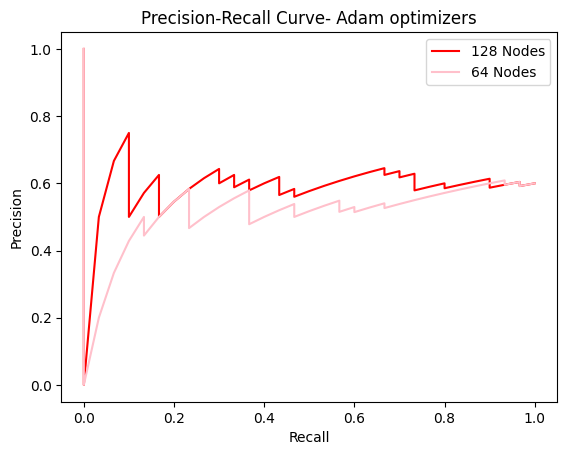

In [385]:

labels = ['64 Nodes', '128 Nodes']
plt.plot(recall1, precision1, color='red', label=labels[1])
plt.plot(recall2, precision2, color='pink', label=labels[0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- Adam optimizers')
plt.legend()
plt.show()

[[12  8]
 [18 12]]


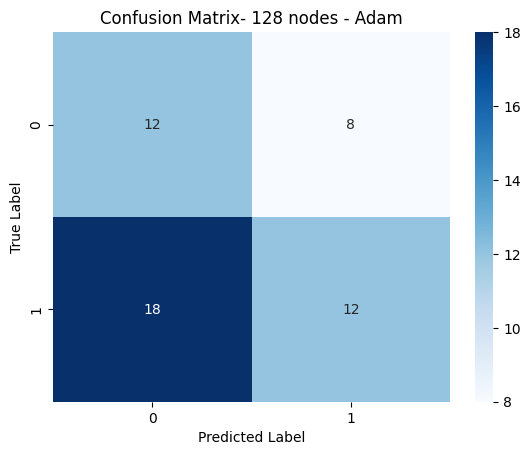

In [387]:
confusion_matrix_result = confusion_matrix(y_test, pred1.round())
print(confusion_matrix_result)
sn.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 128 nodes - Adam')
plt.show()

[[ 1 19]
 [ 2 28]]


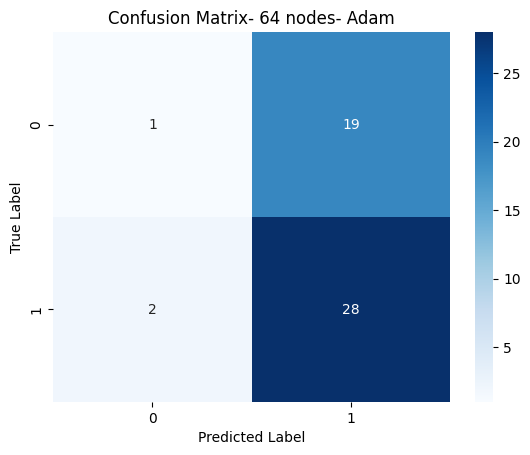

In [388]:
confusion_matrix_result = confusion_matrix(y_test, pred2.round())
print(confusion_matrix_result)
sn.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 64 nodes- Adam')
plt.show()